In [1]:
%matplotlib inline

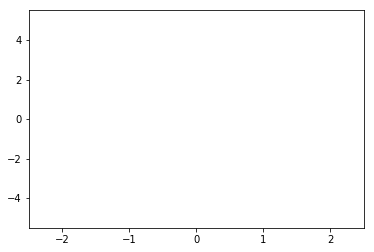

In [9]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct  2 22:03:35 2018

@author: Cerx
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

a = 0
b = 2*np.pi
h = 0.1
#i = len(np.arange(a,b,h))
i = 900

m = 1
l = 1
g = 9.8
mu = 0.05

fig, ax = plt.subplots()
ax.set_xlim([-2.5,2.5])
ax.set_ylim([-5.5,5.5])

tpoints = []
theta_points = []
omega_points = []

theta0 = np.pi/2
omega0 = np.sqrt(g/l)

r = np.array([theta0,omega0],float)

def f(r):
    theta = r[0]
    omega = r[1]
    #fomega = -(g/l)*np.sin(theta)
    fomega = -(g/l)*np.sin(theta) - mu*omega # with friction
    return np.array([omega,fomega],float)

def rk4(r,h):
    k1 = h*f(r)
    k2 = h*f( r + 0.5*k1 )
    k3 = h*f( r + 0.5*k2 )
    k4 = h*f( r + k3 )
    return (k1 + 2*k2 + 2*k3 + k4)/6

def init():
    line, = ax.plot(theta_points,omega_points)
    return line,

def animate(i):
    global r
    r += rk4(r,h)
    theta_points.append(r[0])
    omega_points.append(r[1])
    line, = ax.plot(theta_points, omega_points, marker = '.', color = 'orange')
    return line,
    
anim = animation.FuncAnimation(
        fig, animate, frames = i, init_func = init, interval = 15, blit=True
        )

plt.show()

In [11]:
HTML(anim.to_html5_video())